In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pandas_datareader as web
import datetime as dt

from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM

In [2]:
#Load Data
company = 'AAPL'

start = dt.datetime(2012,1,1)
end = dt.datetime(2020,1,1)

data = web.DataReader(company,'yahoo',start,end)

In [3]:
#Prepare data

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(data['Close'].values.reshape(-1,1))


prediction_days = 100

x_train=[]
y_train=[]

for x in range(prediction_days,len(scaled_data)):
    x_train.append(scaled_data[x-prediction_days:x,0])
    y_train.append(scaled_data[x,0])
    
x_train,y_train=np.array(x_train),np.array(y_train)
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))

In [4]:
scaled_data.shape

(2012, 1)

In [5]:
x_train.shape

(1912, 100, 1)

In [6]:
#Building the model

model = Sequential()
model.add(LSTM(units=50,return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1)) #Predition/Closing Value

model.compile(optimizer='adam',loss='mean_squared_error')
model.fit(x_train,y_train,epochs=25,batch_size=32)

Epoch 1/25
60/60 [==============================] - 4s 63ms/step - loss: 0.0133
Epoch 2/25
60/60 [==============================] - 4s 62ms/step - loss: 0.0022
Epoch 3/25
60/60 [==============================] - 4s 62ms/step - loss: 0.0020
Epoch 4/25
60/60 [==============================] - 4s 64ms/step - loss: 0.0020
Epoch 5/25
60/60 [==============================] - 4s 65ms/step - loss: 0.0018
Epoch 6/25
60/60 [==============================] - 4s 68ms/step - loss: 0.0020
Epoch 7/25
60/60 [==============================] - 4s 68ms/step - loss: 0.0019
Epoch 8/25
60/60 [==============================] - 4s 66ms/step - loss: 0.0017
Epoch 9/25
60/60 [==============================] - 4s 66ms/step - loss: 0.0016
Epoch 10/25
60/60 [==============================] - 4s 67ms/step - loss: 0.0013
Epoch 11/25
60/60 [==============================] - 4s 67ms/step - loss: 0.0017
Epoch 12/25
60/60 [==============================] - 4s 68ms/step - loss: 0.0014
Epoch 13/25
60/60 [==================

In [7]:
#How well the model performs on the past data which we have not seen - Test Error

test_start = dt.datetime(2020,1,1)
test_end = dt.datetime.now()

test_data = web.DataReader(company,'yahoo',test_start,test_end)
actual_prices = test_data['Close'].values

total_dataset = pd.concat((data['Close'],test_data['Close']),axis=0)

#Unseen Data = Test Data 
model_inputs = total_dataset[len(total_dataset)-len(test_data)-prediction_days:].values
model_inputs = model_inputs.reshape(-1,1)
model_inputs = scaler.transform(model_inputs)

#Model Predicions

x_test = []

for x in range(prediction_days,len(model_inputs)):
    x_test.append(scaled_data[x-prediction_days:x,0])

x_test = np.array(x_test)    
x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))  

pred_prices = model.predict(x_test)
pred_prices = scaler.inverse_transform(pred_prices)

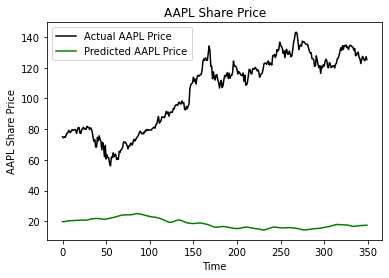

In [8]:
#Plot the Test Predictions

plt.plot(actual_prices,color='black',label=f"Actual {company} Price")
plt.plot(pred_prices, color='green',label=f"Predicted {company} Price")
plt.title(f"{company} Share Price")
plt.xlabel("Time")
plt.ylabel(f"{company} Share Price")
plt.legend()
plt.show()

In [9]:
#Predict Next Day
real_data = [model_inputs[len(model_inputs)+1-prediction_days:len(model_inputs+1),0]]
real_data = np.array(real_data)
real_data = np.reshape(real_data,(real_data.shape[0],real_data.shape[1],1))

prediction = model.predict(real_data)
prediction = scaler.inverse_transform(prediction)
print(f"Prediction: {prediction}")

Prediction: [[129.7185]]
